In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def mc_parallel(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='prodromakis',fon='prodromakis',relationship='linear'):
    def i_cap(c,v,t):
        i=[]
        for j in range(len(v)):
            if j == 0:
                i.append(0)
            else:
                dv = v[j]-v[j-1]
                dt = t[j]-t[j-1]
                i.append(c*dv/dt)
        return i
    
    def vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff,fon,relationship):
        'Memristor model based on the VTEAM model, input paramaters are'

        def prodromakis(x,p,j):
            dum=(x-0.5)**2
            dum1=(dum+0.75)**p
            return(j*(1-dum1))
        def why(x,d):
            return((x*(d-x))/(d**2))
        def johleker(x,p):
            return(1-(((2*x)-1)**(2*p)))

        def dw(v,koff,kon,aoff,aon,voff,von,woff,won,w,p,j,dt):
            
            x = w / (woff-won) 
            if 0<voff<v:
                dum = koff*(((v/voff)-1)**aoff)
                if foff == 'prodromakis':
                    func = prodromakis(x,p,j)
                if foff =='test':
                    func = why(w,woff)
                if foff == 'johleker':
                    func = johleker(x,p)
                return(dum*func*dt)
                   

            if von<v<voff:
                return(0)

            if v<von<0:
                dum = kon*(((v/von)-1)**aon)
                if fon == 'prodromakis':
                    func = prodromakis(x,p,j)
                if fon == 'test':
                    func = why(w,woff)
                if fon == 'johleker':
                    func = johleker(x,p)  
                    
                return(dum*func*dt)

            else: 
                return(0)

        def  linear(roff,ron,woff,won,v,w):
            dum = (roff-ron)/(woff-won)
            dum1 = ((dum * (w-won))+ron)**(-1)

            return((dum1*v),dum1)


        out=[]
        boundarypos=[] 
        if relationship == 'linear':
            rel = linear
        for k in range(len(t)):
            if k!=0:
                dt= (t[k]-t[k-1])
                change=dw(v[k],koff,kon,aoff,aon,voff,von,woff,won,w,p,j,dt)
                w=w+change
                out.append(rel(roff,ron,woff,won,v[k],w)[0])
                boundarypos.append(w)
            else:
                out.append(rel(roff,ron,woff,won,v[k],w)[0])
                boundarypos.append(w)
        return(out,boundarypos)
    
    
    
    icap = i_cap(c,v,t)
    imem = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff,fon,relationship)[0]
    membounary = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff,fon,relationship)[1]

    out = []
    for i in range(len(imem)):
        out.append(icap[i]+imem[i])
    return([out,icap,imem,membounary])

In [3]:
def vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='prodromakis',fon='prodromakis',relationship='linear'):
        'Memristor model based on the VTEAM model, input paramaters are'

        def prodromakis(x,p,j):
            dum=(x-0.5)**2
            dum1=(dum+0.75)**p
            return(j*(1-dum1))
        def why(x,d):
            return((x*(d-x))/(d**2))
        def johleker(x,p):
            return(1-(((2*x)-1)**(2*p)))

        def dw(v,koff,kon,aoff,aon,voff,von,woff,won,w,p,j,dt):
            
            x = w / (woff-won) 
            if 0<voff<v:
                dum = koff*(((v/voff)-1)**aoff)
                if foff == 'prodromakis':
                    func = prodromakis(x,p,j)
                if foff =='test':
                    func = why(w,woff)
                if foff == 'johleker':
                    func = johleker(x,p)
                return(dum*func*dt)
                   

            if von<v<voff:
                return(0)

            if v<von<0:
                dum = kon*(((v/von)-1)**aon)
                if fon == 'prodromakis':
                    func = prodromakis(x,p,j)
                if fon == 'test':
                    func = why(w,woff)
                if fon == 'johleker':
                    func = johleker(x,p)  
                    
                return(dum*func*dt)

            else: 
                return(0)

        def  linear(roff,ron,woff,won,v,w):
            dum = (roff-ron)/(woff-won)
            dum1 = ((dum * (w-won))+ron)**(-1)

            return((dum1*v),dum1)


        out=[]
        boundarypos=[] 
        if relationship == 'linear':
            rel = linear
        for k in range(len(t)):
            if k!=0:
                dt= (t[k]-t[k-1])
                change=dw(v[k],koff,kon,aoff,aon,voff,von,woff,won,w,p,j,dt)
                w=w+change
                out.append(rel(roff,ron,woff,won,v[k],w)[0])
                boundarypos.append(w)
            else:
                out.append(rel(roff,ron,woff,won,v[k],w)[0])
                boundarypos.append(w)
        return(out,boundarypos)

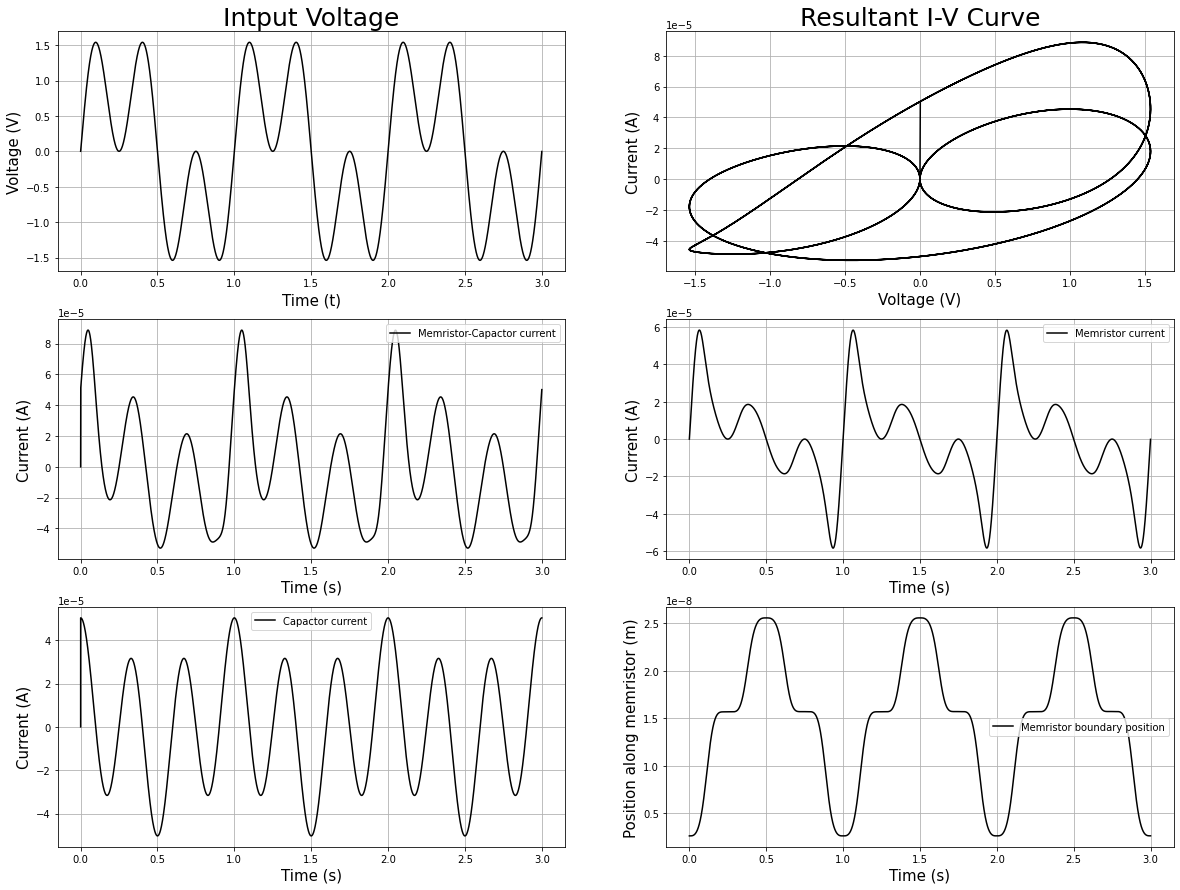

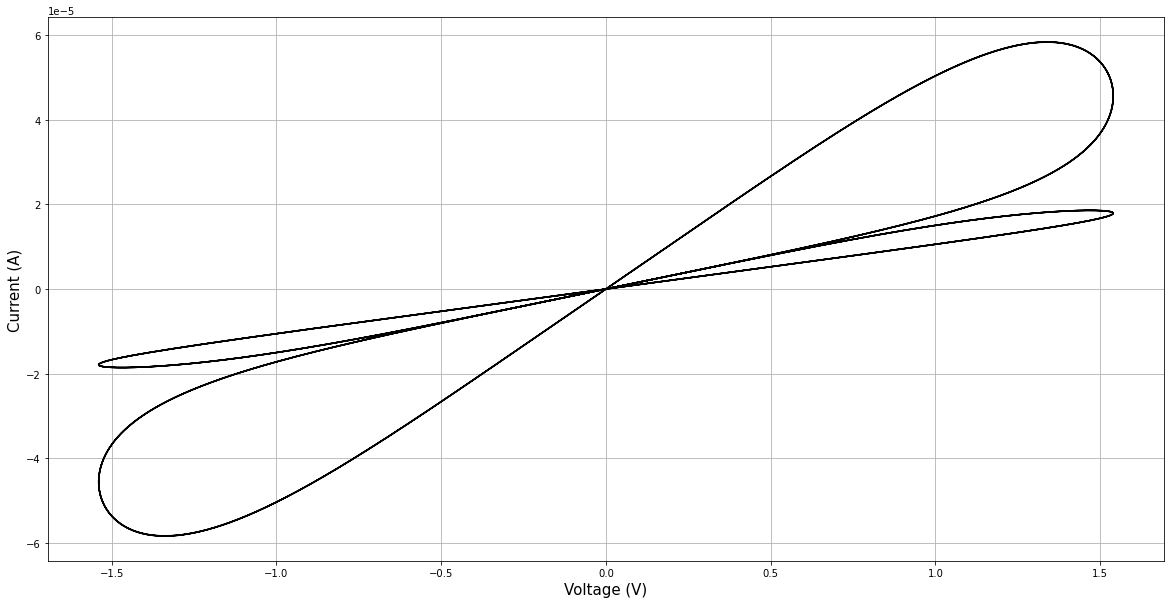

In [4]:
c =2e-6
t = np.arange(0,3,0.0001)
v0 = 1
f1 = 1
f2 = 3
v1 = v0*np.sin(math.pi*2*f1*t)
v2 = v0*np.sin(math.pi*2*f2*t)
v=v1+v2
w = 2.6e-9
won = 0
woff = 27e-9
koff = 3.3e-9
kon = -3.3e-9
aoff = 2
aon = 2
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 2
j = 4

current = mc_parallel(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='test',fon='test')

plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('Intput Voltage',fontsize=25)
plt.plot(t,v,color='black',label='Input Voltage')
plt.ylabel('Voltage (V)',fontsize=15)
plt.xlabel('Time (t)',fontsize=15)
plt.grid()

plt.subplot(3,2,2)
plt.title('Resultant I-V Curve',fontsize=25)
plt.plot(v,current[0],label='I-V Curve',color='black')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()

plt.subplot(3,2,3)
plt.plot(t,current[0],color='black',label='Memristor-Capactor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,4)
plt.plot(t,current[2],color='black',label='Memristor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,5)
plt.plot(t,current[1],color='black',label='Capactor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,6)
plt.plot(t,current[3],color='black',label='Memristor boundary position')
plt.ylabel('Position along memristor (m)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.show()

plt.figure(figsize=(20,10))
plt.plot(v,current[2],color='black')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()
plt.show()

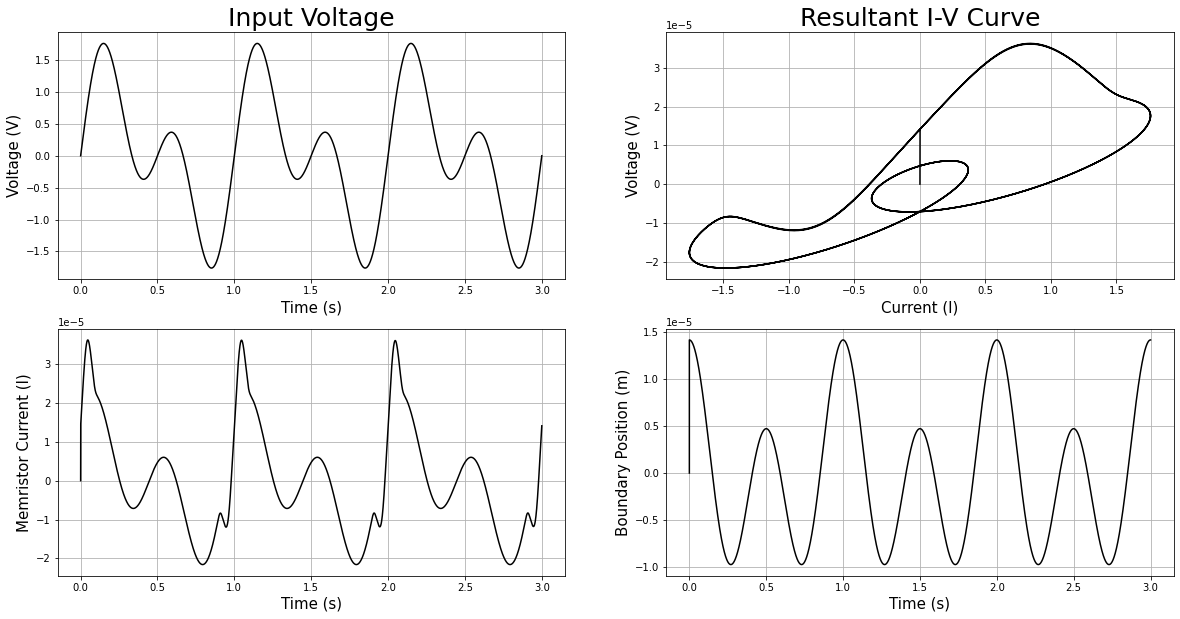

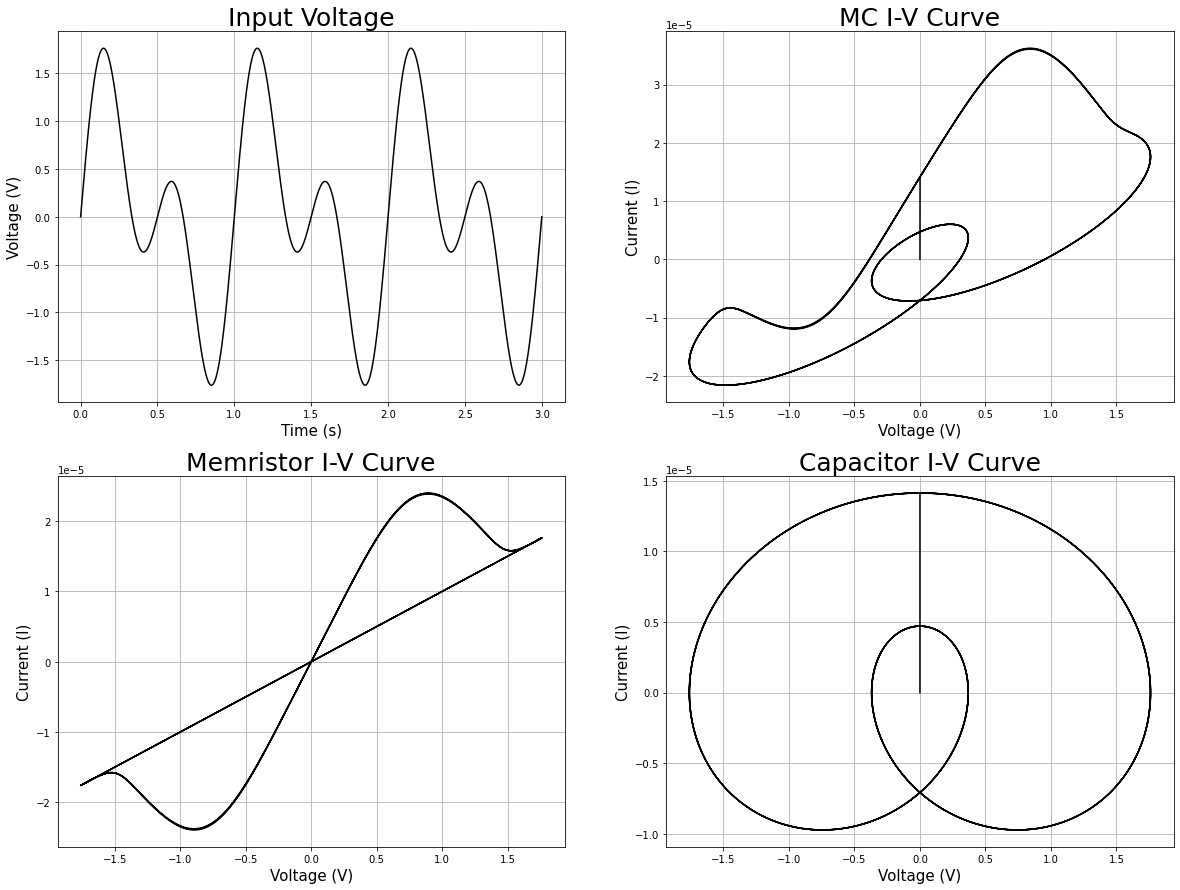

In [5]:
c =0.75e-6
t = np.arange(0,3,0.000001)
v0 = 1
f1 = 1
f2 = 2
v1 = v0*np.sin(math.pi*2*f1*t)
v2 = v0*np.sin(math.pi*2*f2*t)
v = v1 + v2
w = 5.2e-9
won = 0
woff = 27e-9
koff = 3.3e-9
kon = -3.3e-9
aoff = 2
aon = 2
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 2
j = 4

current = mc_parallel(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='johleker',fon='johleker')

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title('Input Voltage',fontsize=25)
plt.plot(t,v,color='black')
plt.ylabel('Voltage (V)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()

plt.subplot(2,2,2)
plt.title('Resultant I-V Curve',fontsize=25)
plt.plot(v,current[0],color='black')
plt.ylabel('Voltage (V)',fontsize=15)
plt.xlabel('Current (I)',fontsize=15)
plt.grid()

plt.subplot(2,2,3)
plt.plot(t,current[0],color='black')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Memristor Current (I)',fontsize=15)
plt.grid()

plt.subplot(2,2,4)
plt.plot(t,current[1],color='black')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Boundary Position (m)',fontsize=15)
plt.grid()

plt.show()

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
plt.title('Input Voltage',fontsize=25)
plt.plot(t,v,color='black')
plt.ylabel('Voltage (V)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()

plt.subplot(2,2,2)
plt.title('MC I-V Curve',fontsize=25)
plt.plot(v,current[0],color='black')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()

plt.subplot(2,2,3)
plt.title('Memristor I-V Curve',fontsize=25)
plt.plot(v,current[2],color='black')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()

plt.subplot(2,2,4)
plt.title('Capacitor I-V Curve',fontsize=25)
plt.plot(v,current[1],color='black')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()

plt.show()

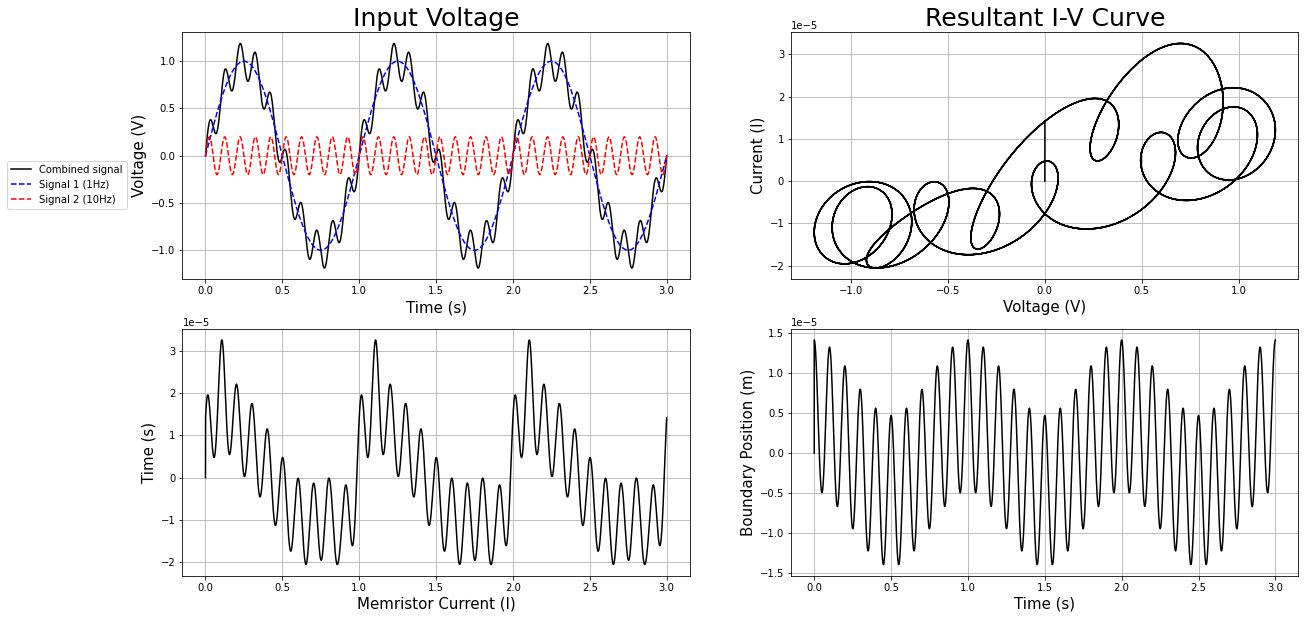

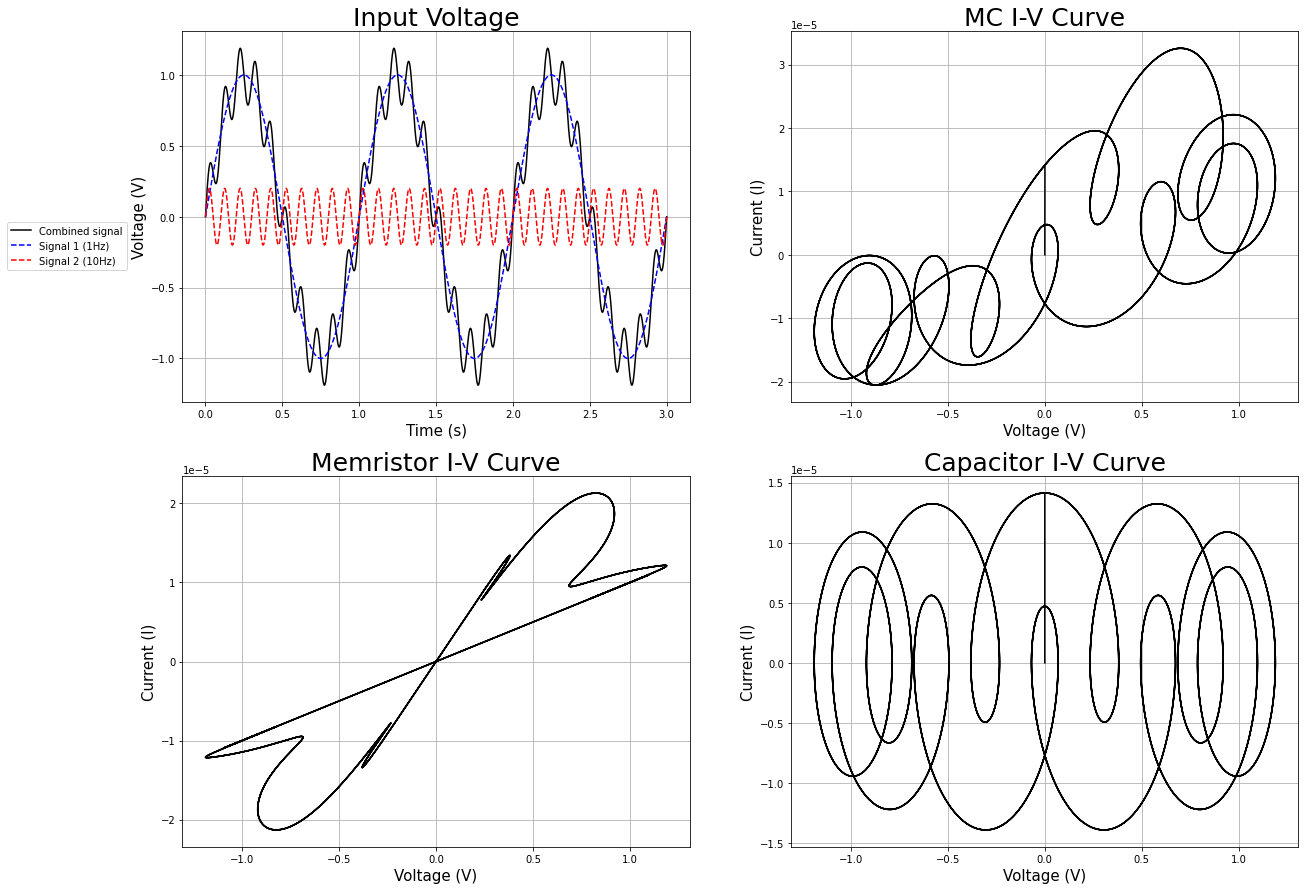

In [45]:
c =0.75e-6
t = np.arange(0,3,0.000001)
v01 = 1
v02 = 0.2
f1 = 1
f2 =10
v1 = v01*np.sin(math.pi*2*f1*t)
v2 = v02*np.sin(math.pi*2*f2*t)
v = v1 + v2
w = 5.2e-9
won = 0
woff = 27e-9
koff = 3.3e-9
kon = -3.3e-9
aoff = 2
aon = 2
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 2
j = 4

current = mc_parallel(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='johleker',fon='johleker')

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title('Input Voltage',fontsize=25)
plt.plot(t,v,color='black',label='Combined signal')
plt.plot(t,v1,color='blue',linestyle='--',label='Signal 1 ('+str(f1)+'Hz)')
plt.plot(t,v2,color='red',linestyle='--',label='Signal 2 ('+str(f2)+'Hz)')
plt.ylabel('Voltage (V)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend(bbox_to_anchor =(-0.1, 0.5))

plt.subplot(2,2,2)
plt.title('Resultant I-V Curve',fontsize=25)
plt.plot(v,current[0],color='black')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()

plt.subplot(2,2,3)
plt.plot(t,current[0],color='black')
plt.ylabel('Time (s)',fontsize=15)
plt.xlabel('Memristor Current (I)',fontsize=15)
plt.grid()

plt.subplot(2,2,4)
plt.plot(t,current[1],color='black')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Boundary Position (m)',fontsize=15)
plt.grid()

plt.show()
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
plt.title('Input Voltage',fontsize=25)
plt.plot(t,v,color='black',label='Combined signal')
plt.plot(t,v1,color='blue',linestyle='--',label='Signal 1 ('+str(f1)+'Hz)')
plt.plot(t,v2,color='red',linestyle='--',label='Signal 2 ('+str(f2)+'Hz)')
plt.ylabel('Voltage (V)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend(bbox_to_anchor =(-0.1, 0.5))

plt.subplot(2,2,2)
plt.title('MC I-V Curve',fontsize=25)
plt.plot(v,current[0],color='black')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()

plt.subplot(2,2,3)
plt.title('Memristor I-V Curve',fontsize=25)
plt.plot(v,current[2],color='black')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()

plt.subplot(2,2,4)
plt.title('Capacitor I-V Curve',fontsize=25)
plt.plot(v,current[1],color='black')
plt.xlabel('Voltage (V)',fontsize=15)
plt.ylabel('Current (I)',fontsize=15)
plt.grid()

plt.show()